In [2]:
from skimage import data, io, filters, novice
from scipy import ndimage
from numpy.linalg import inv
import numpy as np
%matplotlib inline

In [3]:
from matting import blue_screen_matting, bayes_matting, triangulation_matting

# Blue Screen Matting

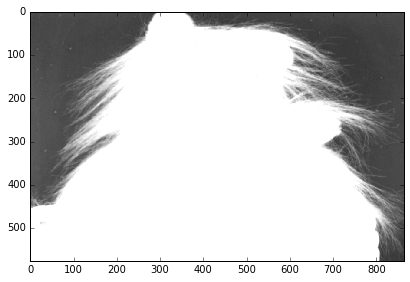

In [15]:
img = io.imread("input.jpg")
res = blue_screen_matting(1,1, img)
io.imshow(res)

# Triangulation Matting

In [1]:
img1 = io.imread("triangulation/img1.jpg")
bg1 = io.imread("triangulation/bg1.jpg")

img2 = io.imread("triangulation/img2.jpg")
bg2 = io.imread("triangulation/bg2.jpg")

res = triangulation_matting(img1, bg1, img2, bg2)
io.imshow(res)

# Bayes Matting

In [8]:
img = io.imread("Bayes/donkey.png")
tri = io.imread("Bayes/donkey_tri.png")
f, b, alpha = bayes_matting(img, tri, sigma_d=2, it=2)
io.imshow(alpha)

# Vlahos

$\alpha(I_b, I_g) = 1 - a_1 (I_b - a_2 I_g)$ 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def vlahos(Ib, Ig, a1, a2):
    """Evaluate Vlahos formula with given I_b and I_g"""
    return 1 - a1 * (Ib - a2 * Ig)

def evaluate_vlahos(a1=0.5, a2=1):   
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(0, 1, 0.2)
    X, Y = np.meshgrid(x, y)
    zs = np.array([vlahos(x,y, a1, a2) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z)
    plt.show()

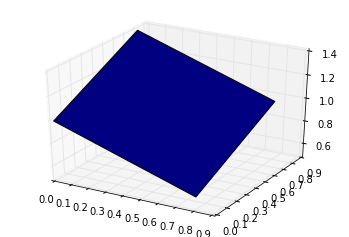

In [51]:
evaluate_vlahos(0.5, 1)

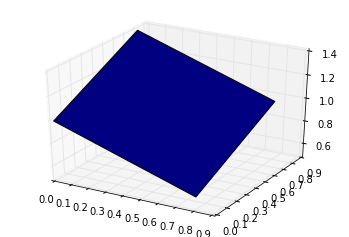

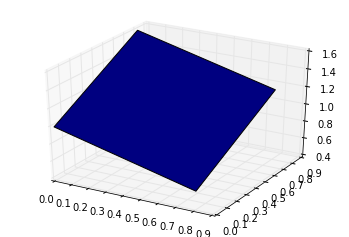

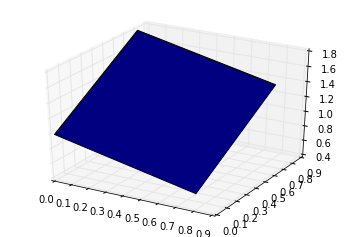

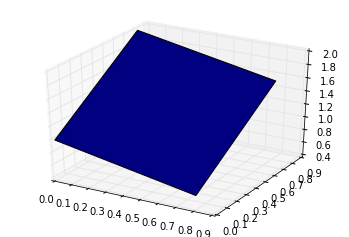

In [57]:
for i in np.arange(1, 3, 0.5):
    evaluate_vlahos(0.5, i)

# 2.7 Triangulation 

In [77]:
f1 = np.array([150, 100, 200])
blue = np.array([0, 2550, 0])
f2 = np.array([140, 180, 40])
green = np.array([0, 0, 255])

def triangulation(f1, b1, f2, b2):
    return 1 - np.dot(f1 - f2, b1 - b2) / float(np.dot(b1 - b2, b1 - b2))

triangulation(f1, blue, f2, green)

1.0372743156668609

# 2.9 Bayes Matting 


In [140]:
from numpy.linalg import LinAlgError

def bayes_calculate_FB(I, a, sigma_d, mean_F, cov_F, mean_B, cov_B):
    try:
        inv_cov_B = np.linalg.inv(cov_B)
        inv_cov_F = np.linalg.inv(cov_F)
    except LinAlgError:
        print("LinAlgError")
    
    a_11 = inv_cov_F + (a**2 / sigma_d**2) * np.identity(3)
    a_22 = inv_cov_B + ((1 - a)**2 / sigma_d**2) * np.identity(3)
    a_12 = a_21 = (a * (1 - a) / sigma_d**2) * np.identity(3)

    b_1 = np.dot(inv_cov_F, mean_F) + (a / sigma_d**2) * I
    b_2 = np.dot(inv_cov_B, mean_B) + ((1 - a) / sigma_d**2) * I

    l = np.empty([6,6])
    l[0] = np.append(a_11[0], a_12[0])
    l[1] = np.append(a_11[1], a_12[1])
    l[2] = np.append(a_11[2], a_12[2])
    l[3] = np.append(a_21[0], a_22[0])
    l[4] = np.append(a_21[1], a_22[1])
    l[5] = np.append(a_21[2], a_22[2])
    r = np.append(b_1, b_2)

    return np.split(np.linalg.solve(l, r), 2)

def bayes_calculate_alpha(I, F, B):
    return (np.dot((I - B), (F - B)) / np.dot(F - B, F - B))
    
    
def bayes_calculation(p, sigma_d, alpha=0.1, it=10):
    for i in range(1):
        F, B = bayes_calculate_FB(p, alpha, sigma_d, mean_F, cov_F, mean_B, cov_B)
        alpha = bayes_calculate_alpha(p, F, B)
    return F, B, alpha

In [138]:
mean_F = np.array([150, 150, 150])
cov_F = np.array([[20, 5, 5], [5, 30, 8], [5, 8, 25]])

mean_B = np.array([50, 50, 200])
cov_B = np.array([[5, 0, 0], [0, 5, 0], [0, 0, 15]])

p = np.array([120, 125, 170])

In [144]:
bayes_calculation(p, 2, alpha=0.3, it=5)

(array([ 182.95558979,  196.64101659,  157.20136728]),
 array([  66.3405629 ,   66.82588102,  184.12473067]),
 0.45514844652964187)

In [145]:
bayes_calculation(p, 10, alpha=0.3, it=5)

(array([ 152.72382737,  154.08032829,  150.53989457]),
 array([  51.33860401,   51.4955164 ,  198.51699424]),
 0.68687569987043229)